## Newton-Raphson ##

The Newton-Raphson method finds the root of a function, $f(x)$, by making use of its first derivative, $f'(x)$. At each iteration, 

$$ x_{n+1} = x_n - \frac{f(x)}{f'(x)} $$

The process is continued until $\frac{f(x)}{f'(x)}$ is sufficiently small. 

In [1]:
import numpy as np

def newton_raphson(f, f_prime, x, tolerance, maxiter):
    '''
    Find the root of the function, f, using the Newton Raphson method.

    Parameters
    ----------
    x : float
        The initial x position
    f : function(float) --> float
        The function to find the root of
    f_prime : function(float) --> float
        The first derivative of the function, f.
    tolerance : float
        The process continues until |f(x)| is smaller than this value.
    maxiter : int
        The maximum number of iterations to perform. In case method gets stuck.

    Returns
    -------
    x_values : list(dtype=float)
        The x values during the root finding. The last value in this list is the root
    fx_values : list(dtype=float)
        The values of f(x) during the root finding.
    fprimex_values :list(dtype=float)
        The values of f'(x) during the root finding. 
    '''
    fx = f(x)
    fprimex = f_prime(x)
    x_values, fx_values, fprimex_values = [x], [fx], [fprimex]
    for _ in range(maxiter):
        if np.abs(fx) < tolerance:
            break
        if fprimex == 0:
            print(f"Error: f'(x)=0 reached, so method could not proceed. Try another starting value.")
            break
        x -= fx/fprimex
        fx = f(x)
        fprimex = f_prime(x)
        x_values.append(x)
        fx_values.append(fx)
        fprimex_values.append(fprimex)
    else: # else after a for loop means "if the for loop is not broken"
        print(f"Warning: Failed to reach |f(x)| < tolerance of {tolerance}. Final |f(x)| = {fx}")

    return x_values, fx_values, fprimex_values

dtanh_dx = lambda x: 1-np.tanh(x)**2
x_values, fx_values, fprimex_values = newton_raphson(np.tanh, dtanh_dx, -1, 10**-8, 1000)

import pandas as pd
df = pd.DataFrame({
    "x": x_values,
    "f(x)" : fx_values,
    "f'(x)": fprimex_values
})
display(df)

,x,f(x),f'(x)
0,-1.000000e+00,-7.615942e-01,0.419974
1,8.134302e-01,6.714782e-01,0.549117
2,-4.094023e-01,-3.879651e-01,0.849483
3,4.730492e-02,4.726966e-02,0.997766
4,-7.060280e-05,-7.060280e-05,1.000000
5,2.346252e-13,2.346252e-13,1.000000


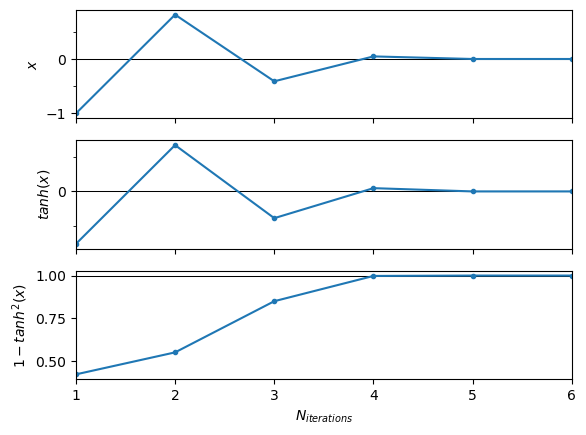

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, sharex=True)

# x
ax[0].axhline(0, color="k", linewidth=0.75)
ax[0].plot(range(1, len(x_values)+1), x_values, marker='.')
ax[0].set_ylabel(r"$x$")

# tanh(x)
ax[1].axhline(0, color="k", linewidth=0.75)
ax[1].plot(range(1, len(fx_values)+1), fx_values, marker='.')
ax[1].set_ylabel(r"$tanh(x)$")

# 1-tanh(x)^2
ax[2].axhline(1, color="k", linewidth=0.75)
ax[2].plot(range(1, len(fprimex_values)+1), fprimex_values, marker='.')
ax[2].set_ylabel(r"$1-tanh^{2}(x)$")
ax[2].set_xlabel(r"$N_{iterations}$")

# X-axis formatting, because sharex=True in plt.subplots, we only have to do this once
ax[0].set_xlim(1, len(x_values))
ax[0].xaxis.set_minor_locator(plt.MultipleLocator(1))

# Y-axis formatting
ax[0].yaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax[0].yaxis.set_major_locator(plt.MultipleLocator(1))
ax[1].yaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax[1].yaxis.set_major_locator(plt.MultipleLocator(1))
plt.show()

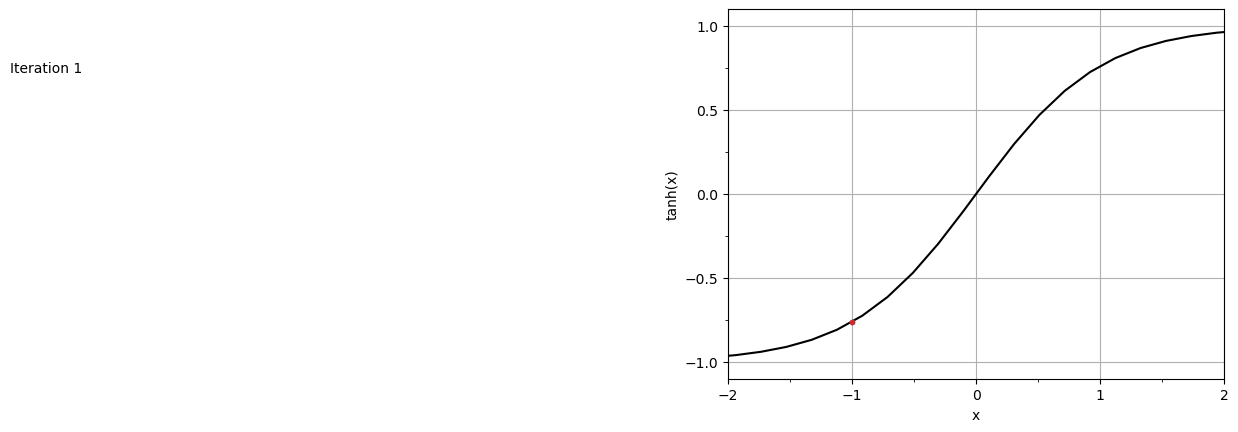

In [6]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

# This is the x and y data you want to plot
xdata, ydata = x_values, fx_values

# Graph tanh(x)
x = np.linspace(-5, 5)
ax.plot(x, np.tanh(x), color="k")

# Initialize lineplots for trajectory and iteration counter
trajectory, = ax.plot([], [], marker=".")
current_pos, = ax.plot([], [], marker=".", color="tab:red")
# IF YOU REUSE THIS CODE YOU MIGHT WANT TO CHANGE WHERE THIS TEXT GOES:
iter_text = ax.text(x=-7.5, y=0.75, s='', horizontalalignment="center", verticalalignment="center")#transform=ax.transAxes)

# Do some formatting
ax.set_xlabel("x")
ax.set_ylabel("tanh(x)")
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.set_xlim(-2, 2)
ax.grid()

def run(i):
    '''
    Function passed to FuncAnimation to update plot
    '''
    trajectory.set_data(xdata[:i+1], ydata[:i+1])
    current_pos.set_data([xdata[i]], [ydata[i]])
    iter_text.set_text(f"Iteration {i+1}")
    
    return trajectory, current_pos,

ani = animation.FuncAnimation(fig, run, frames=len(xdata), interval=1000)

from IPython.display import HTML
HTML(ani.to_jshtml())